In [66]:
%reload_ext autoreload

%autoreload 2

In [67]:
input_file = "../../test_data/system_tests/MaxQuant_Kuster200/evidence.txt"
maxquant_file = "../../test_data/system_tests/MaxQuant_Kuster200/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/MaxQuant_Kuster200/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv.protein_intensities.tsv"

samplemap_directlfq = "../../test_data/system_tests/MaxQuant_Kuster200/samplemap.directLFQ.tsv"

samplemap_maxquant = "../../test_data/system_tests/MaxQuant_Kuster200/samplemap.maxLFQ.tsv"

run_directlfq = True

In [68]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence_benchmark", min_nonan=2)



using input type maxquant_evidence_benchmark


/Users/constantin/workspace/directlfq/directlfq/utils.py:452: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  for input_df_subset in input_df_it:
/Users/constantin/workspace/directlfq/directlfq/utils.py:452: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  for input_df_subset in input_df_it:
/Users/constantin/workspace/directlfq/directlfq/utils.py:452: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  for input_df_subset in input_df_it:
/Users/constantin/workspace/directlfq/directlfq/utils.py:452: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  for input_df_subset in input_df_it:
/Users/constantin/workspace/directlfq/directlfq/utils.py:452: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  for input_df_subset in input_df

prot 100 of 4675
prot 200 of 4675
prot 300 of 4675
prot 400 of 4675
prot 500 of 4675
prot 600 of 4675
prot 700 of 4675
prot 800 of 4675
prot 900 of 4675
prot 1000 of 4675
prot 1100 of 4675
prot 1200 of 4675
prot 1300 of 4675
prot 1400 of 4675
prot 1500 of 4675
prot 1600 of 4675
prot 1700 of 4675
prot 1800 of 4675
prot 1900 of 4675
prot 2000 of 4675
prot 2100 of 4675
prot 2200 of 4675
prot 2300 of 4675
prot 2400 of 4675
prot 2500 of 4675
prot 2600 of 4675
prot 2700 of 4675
prot 2800 of 4675
prot 2900 of 4675
prot 3000 of 4675
prot 3100 of 4675
prot 3200 of 4675
prot 3300 of 4675
prot 3400 of 4675
prot 3500 of 4675
prot 3600 of 4675
prot 3700 of 4675
prot 3800 of 4675
prot 3900 of 4675
prot 4000 of 4675
prot 4100 of 4675
prot 4200 of 4675
prot 4300 of 4675
prot 4400 of 4675
prot 4500 of 4675
prot 4600 of 4675


In [73]:
import numpy as np

class VariationOverview():
    def __init__(self, name, quantified_data, protein_intensity_columns):
        self._protein_intensity_df = quantified_data[protein_intensity_columns]

        self.name = name
        self.quantified_proteins = None
        self._define_quantified_proteins()
    
    def _define_quantified_proteins(self):
        self.quantified_proteins = [QuantifiedProtein(x) for x in self._protein_intensity_df.to_numpy()]


class QuantifiedProtein():
    def __init__(self, intensities):
        intensities = np.where(intensities==0, np.nan, intensities) 
        self.intensities = intensities[np.isfinite(intensities)]
        self.cv = self._calc_cv()
    
    def _calc_cv(self):
        if len(self.intensities)==1:
            return np.nan
        return np.nanstd(self.intensities) / np.nanmean(self.intensities)





In [105]:
import matplotlib.pyplot as plt


class ProteinCVhistogram():
    def __init__(self, list_of_variation_overviews, ax: plt.Axes ):
        self._list_of_variation_overviews = list_of_variation_overviews
        self._ax = ax
        self._plot_histograms()

    def _plot_histograms(self):
        for variation_overview in self._list_of_variation_overviews:
            self._add_cv_histogram(variation_overview)
        
    def _add_cv_histogram(self, variation_overview):
        cvs = sorted([x.cv for x in variation_overview.quantified_proteins])
        all_cvs = len(cvs)
        cvs = [x for x in cvs if x<0.75]
        print(f"{all_cvs - len(cvs)} are very large for {variation_overview.name}")
        print(len(cvs))
        print(np.nanmean(cvs))
        print(np.nanmedian(cvs))
        self._ax.hist(cvs, label=variation_overview.name, cumulative=False, histtype='step', density=False, bins=150, linewidth = 1.5)
        


/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_30105/3059856498.py:24: RuntimeWarning: Mean of empty slice
  return np.nanstd(self.intensities) / np.nanmean(self.intensities)
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_30105/712899038.py:10: DtypeWarning: Columns (5,6,1624,1625,1626,1634,1635) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df_maxquant = pd.read_csv(maxquant_file, sep = "\t")
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_30105/3059856498.py:24: RuntimeWarning: Me

263 are very large for directLFQ
3862
0.07534692777629683
0.06615379736284717
245 are very large for maxLFQ
3893
0.06699552777687856
0.05628455568334554


(0.0, 0.5)

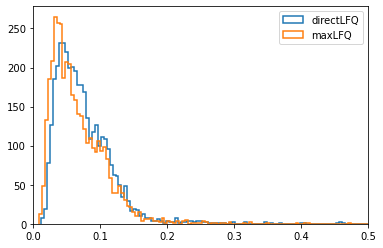

In [106]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils
import pandas as pd

results_df_directlfq = pd.read_csv(directlfq_file, sep="\t")
relevant_columns_directlfq = [x for x in results_df_directlfq.columns if "Cycle" in x]
results_df_directlfq = results_df_directlfq[[";" not in x for x in results_df_directlfq['protein'].astype('str')]]
var_overview_directlfq = VariationOverview("directLFQ", quantified_data=results_df_directlfq, protein_intensity_columns=relevant_columns_directlfq)

results_df_maxquant = pd.read_csv(maxquant_file, sep = "\t")
results_df_maxquant = results_df_maxquant[[";" not in x for x in results_df_maxquant['id'].astype('str')]]
relevant_columns_maxquant = [x for x in results_df_maxquant.columns if "LFQ intensity " in x]
var_overview_maxquant = VariationOverview("maxLFQ", quantified_data=results_df_maxquant, protein_intensity_columns=relevant_columns_maxquant)

ax = plt.subplot()
ProteinCVhistogram([var_overview_directlfq, var_overview_maxquant], ax=ax)
ax.legend()
ax.set_xlim(0, 0.5)
